In [410]:
import pandas as pd
import numpy as np

In [411]:
ods_data = pd.read_csv("ODS_indicators.csv")

In [412]:
ods_data.drop(["Country Name", "Indicator Code"], axis=1, inplace=True)
#ods_data.drop([str(year) for year in range(1990, 2005)], axis=1, inplace=True)

In [413]:

melted_df = ods_data.melt(id_vars=['Country Code', 'Indicator Name'], var_name='Year', value_name='Value')


ods_data = melted_df.pivot_table(index=['Country Code', 'Year'], columns='Indicator Name', values='Value')


ods_data.reset_index(inplace=True)

ods_data

Indicator Name,Country Code,Year,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Adolescent fertility rate (births per 1000 women ages 15-19),Adolescents out of school (% of lower secondary school age),Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),GDP per capita (current US$),Households and NPISHs Final consumption expenditure (annual % growth),Individuals using the Internet (% of population),People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population),People using safely managed drinking water services (% of population),Primary completion rate total (% of relevant age group),Unemployment total (% of total labor force) (modeled ILO estimate),Urban population (% of total population)
0,ABW,1990,NaN,100.000000,50.2700,NaN,NaN,NaN,NaN,12305.387910,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,50.319
1,ABW,1991,NaN,99.153656,49.7000,NaN,NaN,NaN,NaN,13494.685160,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,50.304
2,ABW,1992,NaN,99.197128,49.1300,NaN,NaN,NaN,NaN,14048.347270,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,49.998
3,ABW,1993,NaN,99.239914,48.7648,NaN,NaN,NaN,NaN,14942.274960,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,49.588
4,ABW,1994,NaN,100.000000,48.3996,NaN,NaN,NaN,NaN,16241.575590,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,49.177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8078,ZWE,2016,29.8,42.561729,90.6766,2.261470,66.879997,7.05,26.070000,1464.588957,-10.501114,23.119989,64.468964,37.529193,30.183683,99.265839,4.788,32.296
8079,ZWE,2017,29.8,44.178635,86.1350,2.356790,66.480003,6.90,26.629999,1235.189032,1.396143,24.400000,63.996625,36.941673,29.997683,95.476372,4.785,32.237
8080,ZWE,2018,29.9,45.572647,83.2486,6.226070,66.019997,6.75,27.230000,1254.642265,-22.393220,25.000000,63.538773,36.357160,29.827913,92.195152,4.796,32.209
8081,ZWE,2019,30.1,46.781475,80.3622,7.544310,66.190002,6.57,27.240000,1316.740657,NaN,25.100000,63.094957,35.774337,29.673569,88.508812,4.833,32.210


In [414]:
indicators_data = pd.read_csv("HDR23-24_Composite_indices_complete_time_series.csv",  encoding='latin1')

In [415]:
# Eliminar columnas
indicators_data = indicators_data.drop(["hdicode","region"], axis=1)
indicators_data = indicators_data.rename(columns={"iso3":"Country Code"})

In [416]:

# Usar pd.melt para aplanar el DataFrame
df_melted = pd.melt(indicators_data, id_vars=['Country Code', 'country'], var_name='variable_year', value_name='value')

# Separar 'variable' y 'year' usando rsplit
df_melted[['variable', 'Year']] = df_melted['variable_year'].str.rsplit('_', n=1, expand=True)

# Pivotar para tener una columna por cada variable
indicators_data = df_melted.pivot_table(index=['Country Code', 'country', 'Year'], columns='variable', values='value').reset_index()

# Eliminar variables extras
columns_to_keep = ['Country Code', 'country', 'Year', 'hdi', 'eys', 'le', 'mys', 'pop_total']

# Seleccionar solo las columnas que están en la lista
indicators_data = indicators_data.loc[:, columns_to_keep]
indicators_data

# hdi - IDH
# eys: Años esperados de escolarización (Expected Years of Schooling)
# le: Esperanza de vida al nacer (Life Expectancy)
# mys: Años medios de escolarización (Mean Years of Schooling)
# pop_total: Población total
# ineq_edu: Desigualdad en educación
# ineq_inc: Desigualdad en ingresos
# coef_ineq: Coeficiente de desigualdad (posiblemente el coeficiente de Gini)


variable,Country Code,country,Year,hdi,eys,le,mys,pop_total
0,AFG,Afghanistan,1990,0.284,2.936460,45.967000,0.871962,10.694796
1,AFG,Afghanistan,1991,0.292,3.228456,46.663000,0.915267,10.745167
2,AFG,Afghanistan,1992,0.299,3.520452,47.596000,0.958573,12.057433
3,AFG,Afghanistan,1993,0.307,3.812448,51.466000,1.001878,14.003760
4,AFG,Afghanistan,1994,0.300,4.104445,51.495000,1.045184,15.455554
...,...,...,...,...,...,...,...,...
6793,ZZK.WORLD,World,2018,0.735,12.651182,72.816178,8.483187,7649.567694
6794,ZZK.WORLD,World,2019,0.739,12.726141,73.012121,8.574383,7730.660623
6795,ZZK.WORLD,World,2020,0.736,12.860674,72.257355,8.686374,7806.602793
6796,ZZK.WORLD,World,2021,0.735,12.911840,71.365524,8.682265,7874.877719


In [417]:
data = pd.merge(ods_data, indicators_data, on=['Country Code', 'Year'])
data

,Country Code,Year,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Adolescent fertility rate (births per 1000 women ages 15-19),Adolescents out of school (% of lower secondary school age),Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),GDP per capita (current US$),...,People using safely managed drinking water services (% of population),Primary completion rate total (% of relevant age group),Unemployment total (% of total labor force) (modeled ILO estimate),Urban population (% of total population),country,hdi,eys,le,mys,pop_total
0,AFG,1990,NaN,NaN,162.8354,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,21.177,Afghanistan,0.284,2.936460,45.967,0.871962,10.694796
1,AFG,1991,NaN,NaN,163.3822,NaN,63.430000,12.43,24.139999,NaN,...,NaN,NaN,10.649,21.266,Afghanistan,0.292,3.228456,46.663,0.915267,10.745167
2,AFG,1992,NaN,NaN,163.9290,NaN,63.650002,12.21,24.139999,NaN,...,NaN,NaN,10.821,21.355,Afghanistan,0.299,3.520452,47.596,0.958573,12.057433
3,AFG,1993,NaN,NaN,164.1888,NaN,64.410004,11.57,24.030001,NaN,...,NaN,27.575171,10.723,21.444,Afghanistan,0.307,3.812448,51.466,1.001878,14.003760
4,AFG,1994,NaN,NaN,164.4486,NaN,64.440002,11.48,24.080000,NaN,...,NaN,NaN,10.726,21.534,Afghanistan,0.300,4.104445,51.495,1.045184,15.455554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6040,ZWE,2016,29.8,42.561729,90.6766,2.261470,66.879997,7.05,26.070000,1464.588957,...,30.183683,99.265839,4.788,32.296,Zimbabwe,0.547,10.899038,60.306,8.425370,14.452704
6041,ZWE,2017,29.8,44.178635,86.1350,2.356790,66.480003,6.90,26.629999,1235.189032,...,29.997683,95.476372,4.785,32.237,Zimbabwe,0.552,10.930538,60.709,8.461690,14.751101
6042,ZWE,2018,29.9,45.572647,83.2486,6.226070,66.019997,6.75,27.230000,1254.642265,...,29.827913,92.195152,4.796,32.209,Zimbabwe,0.564,10.962130,61.414,8.574575,15.052184
6043,ZWE,2019,30.1,46.781475,80.3622,7.544310,66.190002,6.57,27.240000,1316.740657,...,29.673569,88.508812,4.833,32.210,Zimbabwe,0.560,10.993813,61.292,8.687460,15.354608


In [418]:
# Eliminar columnas
df_clean = data.drop(['People using safely managed drinking water services (% of population)', 'Adolescents out of school (% of lower secondary school age)', 'Households and NPISHs Final consumption expenditure (annual % growth)'], axis=1)

In [419]:
print("Valores pre limpieza")
print("Valores NaN:\n", df_clean.isna().sum())

numeric_columns = df_clean.select_dtypes(include=['float64', 'int64']).columns
column_means = df_clean[numeric_columns].mean()
#df_clean =  data.copy()  # Copia del DataFrame original para no modificarlo directamente
df_clean[numeric_columns] = df_clean[numeric_columns].fillna(column_means)
#print("Valores NaN:\n", df_clean.isna().sum())
#df_clean = df_clean.dropna()

Valores pre limpieza
Valores NaN:
 Country Code                                                                   0
Year                                                                           0
Access to clean fuels and technologies for cooking (% of population)        2059
Access to electricity (% of population)                                      787
Adolescent fertility rate (births per 1000 women ages 15-19)                 310
Employment in agriculture (% of total employment) (modeled ILO estimate)     825
Employment in industry (% of total employment) (modeled ILO estimate)        825
Employment in services (% of total employment) (modeled ILO estimate)        825
GDP per capita (current US$)                                                 247
Individuals using the Internet (% of population)                             336
People using at least basic drinking water services (% of population)       2025
People using at least basic sanitation services (% of population)         

In [420]:
df_clean

,Country Code,Year,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Adolescent fertility rate (births per 1000 women ages 15-19),Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),GDP per capita (current US$),Individuals using the Internet (% of population),...,People using at least basic sanitation services (% of population),Primary completion rate total (% of relevant age group),Unemployment total (% of total labor force) (modeled ILO estimate),Urban population (% of total population),country,hdi,eys,le,mys,pop_total
0,AFG,1990,62.983721,79.109812,162.8354,30.544245,19.891328,49.565843,11208.654030,0.000000,...,71.981983,85.880304,8.220484,21.177,Afghanistan,0.284,2.936460,45.967,0.871962,10.694796
1,AFG,1991,62.983721,79.109812,163.3822,63.430000,12.430000,24.139999,11208.654030,0.000000,...,71.981983,85.880304,10.649000,21.266,Afghanistan,0.292,3.228456,46.663,0.915267,10.745167
2,AFG,1992,62.983721,79.109812,163.9290,63.650002,12.210000,24.139999,11208.654030,0.000000,...,71.981983,85.880304,10.821000,21.355,Afghanistan,0.299,3.520452,47.596,0.958573,12.057433
3,AFG,1993,62.983721,79.109812,164.1888,64.410004,11.570000,24.030001,11208.654030,0.000000,...,71.981983,27.575171,10.723000,21.444,Afghanistan,0.307,3.812448,51.466,1.001878,14.003760
4,AFG,1994,62.983721,79.109812,164.4486,64.440002,11.480000,24.080000,11208.654030,0.000000,...,71.981983,85.880304,10.726000,21.534,Afghanistan,0.300,4.104445,51.495,1.045184,15.455554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6040,ZWE,2016,29.800000,42.561729,90.6766,66.879997,7.050000,26.070000,1464.588957,23.119989,...,37.529193,99.265839,4.788000,32.296,Zimbabwe,0.547,10.899038,60.306,8.425370,14.452704
6041,ZWE,2017,29.800000,44.178635,86.1350,66.480003,6.900000,26.629999,1235.189032,24.400000,...,36.941673,95.476372,4.785000,32.237,Zimbabwe,0.552,10.930538,60.709,8.461690,14.751101
6042,ZWE,2018,29.900000,45.572647,83.2486,66.019997,6.750000,27.230000,1254.642265,25.000000,...,36.357160,92.195152,4.796000,32.209,Zimbabwe,0.564,10.962130,61.414,8.574575,15.052184
6043,ZWE,2019,30.100000,46.781475,80.3622,66.190002,6.570000,27.240000,1316.740657,25.100000,...,35.774337,88.508812,4.833000,32.210,Zimbabwe,0.560,10.993813,61.292,8.687460,15.354608


In [421]:
# Librerías necesarias para clustering

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

In [422]:
df_coded = df_clean.copy()
df_coded["Country Code"] = df_coded["Country Code"].astype('category').cat.codes
df_coded["country"] = df_coded["country"].astype('category').cat.codes

df_coded

,Country Code,Year,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Adolescent fertility rate (births per 1000 women ages 15-19),Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),GDP per capita (current US$),Individuals using the Internet (% of population),...,People using at least basic sanitation services (% of population),Primary completion rate total (% of relevant age group),Unemployment total (% of total labor force) (modeled ILO estimate),Urban population (% of total population),country,hdi,eys,le,mys,pop_total
0,0,1990,62.983721,79.109812,162.8354,30.544245,19.891328,49.565843,11208.654030,0.000000,...,71.981983,85.880304,8.220484,21.177,0,0.284,2.936460,45.967,0.871962,10.694796
1,0,1991,62.983721,79.109812,163.3822,63.430000,12.430000,24.139999,11208.654030,0.000000,...,71.981983,85.880304,10.649000,21.266,0,0.292,3.228456,46.663,0.915267,10.745167
2,0,1992,62.983721,79.109812,163.9290,63.650002,12.210000,24.139999,11208.654030,0.000000,...,71.981983,85.880304,10.821000,21.355,0,0.299,3.520452,47.596,0.958573,12.057433
3,0,1993,62.983721,79.109812,164.1888,64.410004,11.570000,24.030001,11208.654030,0.000000,...,71.981983,27.575171,10.723000,21.444,0,0.307,3.812448,51.466,1.001878,14.003760
4,0,1994,62.983721,79.109812,164.4486,64.440002,11.480000,24.080000,11208.654030,0.000000,...,71.981983,85.880304,10.726000,21.534,0,0.300,4.104445,51.495,1.045184,15.455554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6040,194,2016,29.800000,42.561729,90.6766,66.879997,7.050000,26.070000,1464.588957,23.119989,...,37.529193,99.265839,4.788000,32.296,194,0.547,10.899038,60.306,8.425370,14.452704
6041,194,2017,29.800000,44.178635,86.1350,66.480003,6.900000,26.629999,1235.189032,24.400000,...,36.941673,95.476372,4.785000,32.237,194,0.552,10.930538,60.709,8.461690,14.751101
6042,194,2018,29.900000,45.572647,83.2486,66.019997,6.750000,27.230000,1254.642265,25.000000,...,36.357160,92.195152,4.796000,32.209,194,0.564,10.962130,61.414,8.574575,15.052184
6043,194,2019,30.100000,46.781475,80.3622,66.190002,6.570000,27.240000,1316.740657,25.100000,...,35.774337,88.508812,4.833000,32.210,194,0.560,10.993813,61.292,8.687460,15.354608


# Clustering

In [423]:
clusters = {}

In [424]:
X = df_coded[df_coded.columns]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [425]:
def elbowMethod(scaled_Data, cluster_name):
    kmeans_kwargs = {
        "init": "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
    }

    wcss = []
    for k in range(1, 41):
        kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
        kmeans.fit(scaled_Data)
        wcss.append(kmeans.inertia_)
    
    datos_WCSS = pd.DataFrame(range(1, 41), columns = ["K"])
    datos_WCSS["WCSS"] = wcss

    fig = px.line(datos_WCSS, x = "K" , y = "WCSS", title='WCSS vrs K')
    fig.update_layout(title=cluster_name)
    fig.show()

    localizador_codo = KneeLocator(range(1, 41), 
                               wcss, 
                               curve="convex", 
                               direction="decreasing"
                              )
    return localizador_codo.elbow

In [426]:
def silhouetteMethod(scaled_Data, cluster_name):
    kmeans_kwargs = {
        "init": "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
    }

    silhouette_scores = []
    for k in range(2, 41):  # Empezamos en 2 porque la silueta no está definida para k=1
        kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
        kmeans.fit(scaled_Data)
        score = silhouette_score(scaled_Data, kmeans.labels_)
        silhouette_scores.append(score)
    
    datos_silhouette = pd.DataFrame(range(2, 41), columns = ["K"])
    datos_silhouette["Silhouette Score"] = silhouette_scores

    fig = px.line(datos_silhouette, x = "K" , y = "Silhouette Score", title='Silhouette Score vs K')
    fig.update_layout(title=cluster_name)
    fig.show()

    best_k = datos_silhouette.loc[datos_silhouette["Silhouette Score"].idxmax()]["K"]
    return int(best_k)


In [427]:
optimalKSilhouette = silhouetteMethod(X_scaled, "Método de la silueta")

optimalKSilhouette

2

In [429]:
optimalK = elbowMethod(X_scaled, "Método del codo")

optimalK

8

# Creación de Clusters con K óptimo según método de la silueta

In [430]:
kmeans = KMeans(n_clusters = int(optimalKSilhouette))
kmeans.fit(X)

KMeans(n_clusters=2)

In [431]:
clusters_identificados_silhouette = kmeans.fit_predict(X)
clusters_identificados_silhouette

array([1, 1, 1, ..., 1, 1, 1])

In [432]:
df_cluster_silhouette = df_coded.copy()
df_cluster_silhouette['Cluster'] = clusters_identificados_silhouette

df_cluster_silhouette.head()

,Country Code,Year,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Adolescent fertility rate (births per 1000 women ages 15-19),Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),GDP per capita (current US$),Individuals using the Internet (% of population),...,Primary completion rate total (% of relevant age group),Unemployment total (% of total labor force) (modeled ILO estimate),Urban population (% of total population),country,hdi,eys,le,mys,pop_total,Cluster
0,0,1990,62.983721,79.109812,162.8354,30.544245,19.891328,49.565843,11208.65403,0.0,...,85.880304,8.220484,21.177,0,0.284,2.936460,45.967,0.871962,10.694796,1
1,0,1991,62.983721,79.109812,163.3822,63.430000,12.430000,24.139999,11208.65403,0.0,...,85.880304,10.649000,21.266,0,0.292,3.228456,46.663,0.915267,10.745167,1
2,0,1992,62.983721,79.109812,163.9290,63.650002,12.210000,24.139999,11208.65403,0.0,...,85.880304,10.821000,21.355,0,0.299,3.520452,47.596,0.958573,12.057433,1
3,0,1993,62.983721,79.109812,164.1888,64.410004,11.570000,24.030001,11208.65403,0.0,...,27.575171,10.723000,21.444,0,0.307,3.812448,51.466,1.001878,14.003760,1
4,0,1994,62.983721,79.109812,164.4486,64.440002,11.480000,24.080000,11208.65403,0.0,...,85.880304,10.726000,21.534,0,0.300,4.104445,51.495,1.045184,15.455554,1


# Creación de Clusters con K óptimo según método del codo

In [433]:
kmeans = KMeans(n_clusters = int(optimalK))
# kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

KMeans()

In [434]:
clusters_identificados = kmeans.fit_predict(X)
clusters_identificados

array([0, 0, 0, ..., 4, 4, 4])

In [435]:
df_cluster_elbow = df_coded.copy()
df_cluster_elbow['Cluster'] = clusters_identificados

df_cluster_elbow.head()

,Country Code,Year,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Adolescent fertility rate (births per 1000 women ages 15-19),Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),GDP per capita (current US$),Individuals using the Internet (% of population),...,Primary completion rate total (% of relevant age group),Unemployment total (% of total labor force) (modeled ILO estimate),Urban population (% of total population),country,hdi,eys,le,mys,pop_total,Cluster
0,0,1990,62.983721,79.109812,162.8354,30.544245,19.891328,49.565843,11208.65403,0.0,...,85.880304,8.220484,21.177,0,0.284,2.936460,45.967,0.871962,10.694796,0
1,0,1991,62.983721,79.109812,163.3822,63.430000,12.430000,24.139999,11208.65403,0.0,...,85.880304,10.649000,21.266,0,0.292,3.228456,46.663,0.915267,10.745167,0
2,0,1992,62.983721,79.109812,163.9290,63.650002,12.210000,24.139999,11208.65403,0.0,...,85.880304,10.821000,21.355,0,0.299,3.520452,47.596,0.958573,12.057433,0
3,0,1993,62.983721,79.109812,164.1888,64.410004,11.570000,24.030001,11208.65403,0.0,...,27.575171,10.723000,21.444,0,0.307,3.812448,51.466,1.001878,14.003760,0
4,0,1994,62.983721,79.109812,164.4486,64.440002,11.480000,24.080000,11208.65403,0.0,...,85.880304,10.726000,21.534,0,0.300,4.104445,51.495,1.045184,15.455554,0


## Aplicación de PCA para graficar clusters

In [436]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [437]:
def plot_clusters_pca(data, n_clusters, plot_3d=False):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data.drop('Cluster', axis=1))

    pca = PCA(n_components=3 if plot_3d else 2)
    pca.fit(data_scaled)
    x_pca = pca.transform(data_scaled)

    if plot_3d:
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2], c=data['Cluster'], cmap='plasma')
        ax.set_xlabel('Primer componente principal')
        ax.set_ylabel('Segundo componente principal')
        ax.set_zlabel('Tercer componente principal')
        legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
        ax.add_artist(legend1)
    else:
        plt.figure(figsize=(8, 6))
        scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=data['Cluster'], cmap='plasma')
        plt.xlabel('Primer componente principal')
        plt.ylabel('Segundo componente principal')
        plt.legend(*scatter.legend_elements(), title="Cluster")

    plt.show()
    return x_pca

In [438]:
df_cluster_silhouette = df_coded.copy()
df_cluster_silhouette['Cluster'] = clusters_identificados_silhouette
df_cluster_silhouette = df_cluster_silhouette.drop(['Country Code', 'Year', 'country'], axis=1)
df_cluster_silhouette.head()

,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Adolescent fertility rate (births per 1000 women ages 15-19),Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),GDP per capita (current US$),Individuals using the Internet (% of population),People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population),Primary completion rate total (% of relevant age group),Unemployment total (% of total labor force) (modeled ILO estimate),Urban population (% of total population),hdi,eys,le,mys,pop_total,Cluster
0,62.983721,79.109812,162.8354,30.544245,19.891328,49.565843,11208.65403,0.0,84.903641,71.981983,85.880304,8.220484,21.177,0.284,2.936460,45.967,0.871962,10.694796,1
1,62.983721,79.109812,163.3822,63.430000,12.430000,24.139999,11208.65403,0.0,84.903641,71.981983,85.880304,10.649000,21.266,0.292,3.228456,46.663,0.915267,10.745167,1
2,62.983721,79.109812,163.9290,63.650002,12.210000,24.139999,11208.65403,0.0,84.903641,71.981983,85.880304,10.821000,21.355,0.299,3.520452,47.596,0.958573,12.057433,1
3,62.983721,79.109812,164.1888,64.410004,11.570000,24.030001,11208.65403,0.0,84.903641,71.981983,27.575171,10.723000,21.444,0.307,3.812448,51.466,1.001878,14.003760,1
4,62.983721,79.109812,164.4486,64.440002,11.480000,24.080000,11208.65403,0.0,84.903641,71.981983,85.880304,10.726000,21.534,0.300,4.104445,51.495,1.045184,15.455554,1


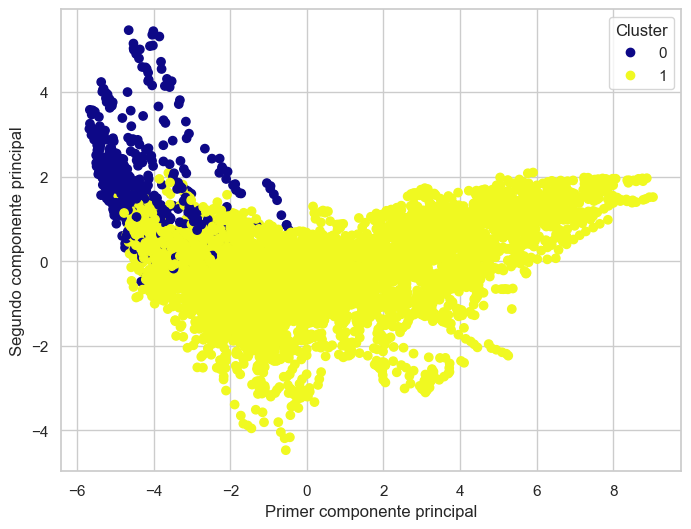

array([[ 3.69624472, -1.26974494,  1.        ],
       [ 4.61117603, -0.74663399,  1.        ],
       [ 4.55455313, -0.7246173 ,  1.        ],
       ...,
       [ 3.21384088,  1.31527317,  1.        ],
       [ 3.24728423,  1.34429617,  1.        ],
       [ 2.00758899,  0.30199261,  1.        ]])

In [439]:
X_pca_silhouette = plot_clusters_pca(df_cluster_silhouette, optimalKSilhouette)

x_pca_clusters_silhouette = np.hstack((X_pca_silhouette, clusters_identificados_silhouette.reshape(-1, 1)))
x_pca_clusters_silhouette

In [440]:
df_cluster_elbow = df_coded.copy()
df_cluster_elbow['Cluster'] = clusters_identificados
df_cluster_elbow = df_cluster_elbow.drop(['Country Code', 'Year', 'country'], axis=1)
df_cluster_elbow.head()

,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Adolescent fertility rate (births per 1000 women ages 15-19),Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),GDP per capita (current US$),Individuals using the Internet (% of population),People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population),Primary completion rate total (% of relevant age group),Unemployment total (% of total labor force) (modeled ILO estimate),Urban population (% of total population),hdi,eys,le,mys,pop_total,Cluster
0,62.983721,79.109812,162.8354,30.544245,19.891328,49.565843,11208.65403,0.0,84.903641,71.981983,85.880304,8.220484,21.177,0.284,2.936460,45.967,0.871962,10.694796,0
1,62.983721,79.109812,163.3822,63.430000,12.430000,24.139999,11208.65403,0.0,84.903641,71.981983,85.880304,10.649000,21.266,0.292,3.228456,46.663,0.915267,10.745167,0
2,62.983721,79.109812,163.9290,63.650002,12.210000,24.139999,11208.65403,0.0,84.903641,71.981983,85.880304,10.821000,21.355,0.299,3.520452,47.596,0.958573,12.057433,0
3,62.983721,79.109812,164.1888,64.410004,11.570000,24.030001,11208.65403,0.0,84.903641,71.981983,27.575171,10.723000,21.444,0.307,3.812448,51.466,1.001878,14.003760,0
4,62.983721,79.109812,164.4486,64.440002,11.480000,24.080000,11208.65403,0.0,84.903641,71.981983,85.880304,10.726000,21.534,0.300,4.104445,51.495,1.045184,15.455554,0


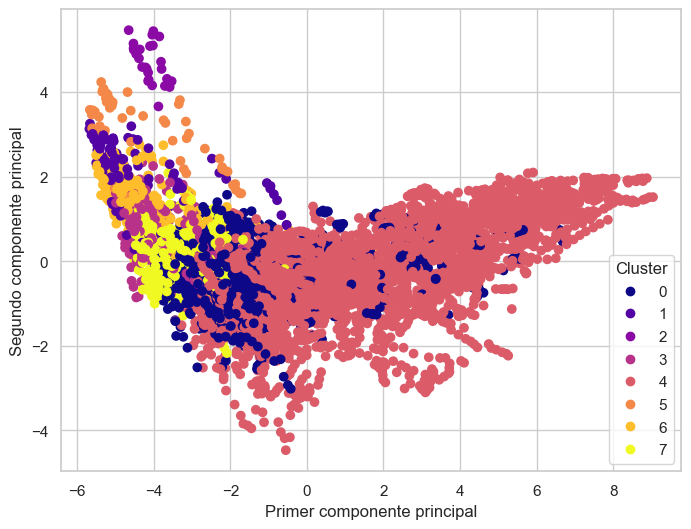

array([[ 3.69624472, -1.26975689,  0.        ],
       [ 4.61117602, -0.74690841,  0.        ],
       [ 4.55455313, -0.72488461,  0.        ],
       ...,
       [ 3.21384088,  1.31518153,  4.        ],
       [ 3.24728423,  1.34421509,  4.        ],
       [ 2.00758899,  0.30208551,  4.        ]])

In [441]:
X_pca = plot_clusters_pca(df_cluster_elbow, optimalK)

x_pca_clusters = np.hstack((X_pca, clusters_identificados.reshape(-1, 1)))
x_pca_clusters

C:\Users\erick\AppData\Local\Temp\ipykernel_11024\4116678144.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




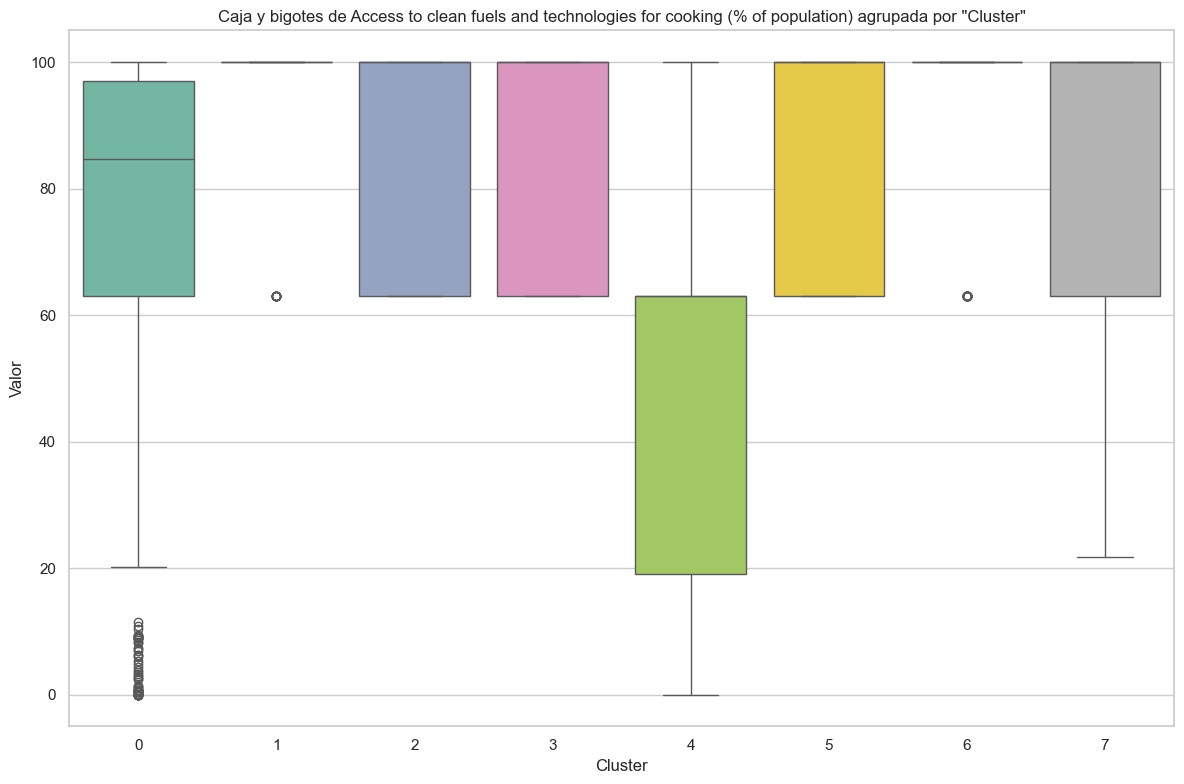

C:\Users\erick\AppData\Local\Temp\ipykernel_11024\4116678144.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




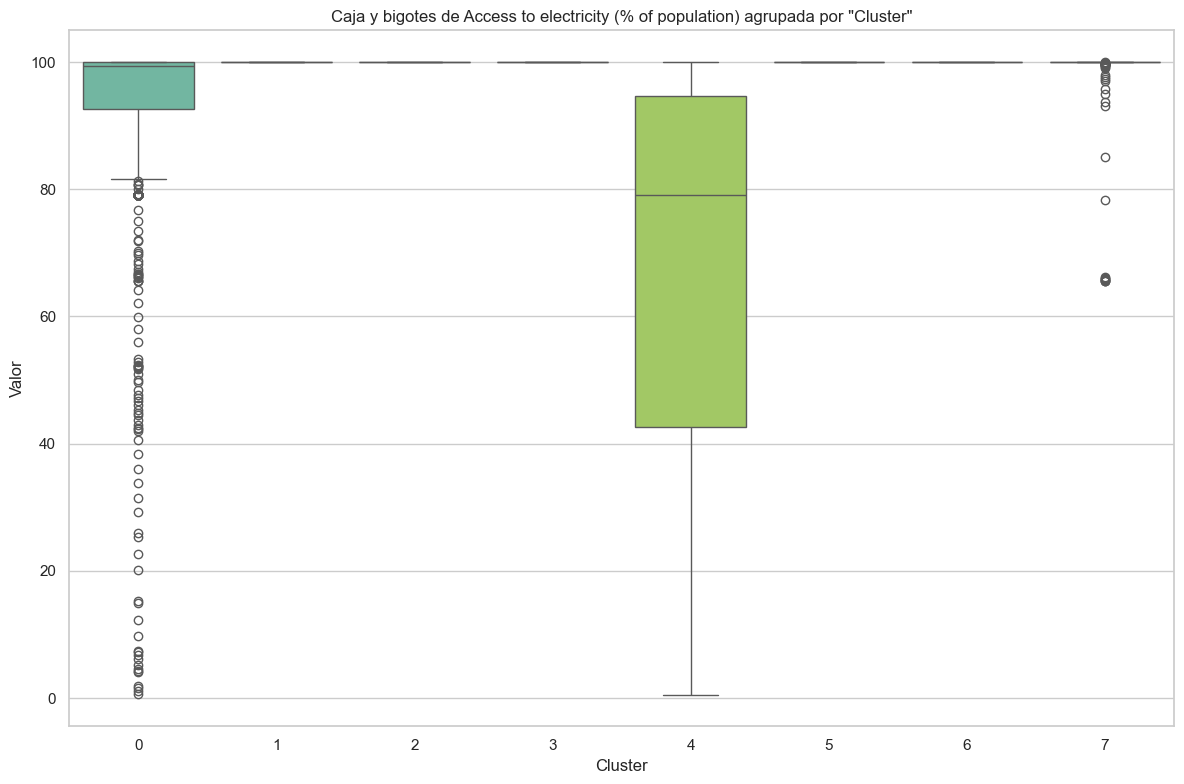

C:\Users\erick\AppData\Local\Temp\ipykernel_11024\4116678144.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




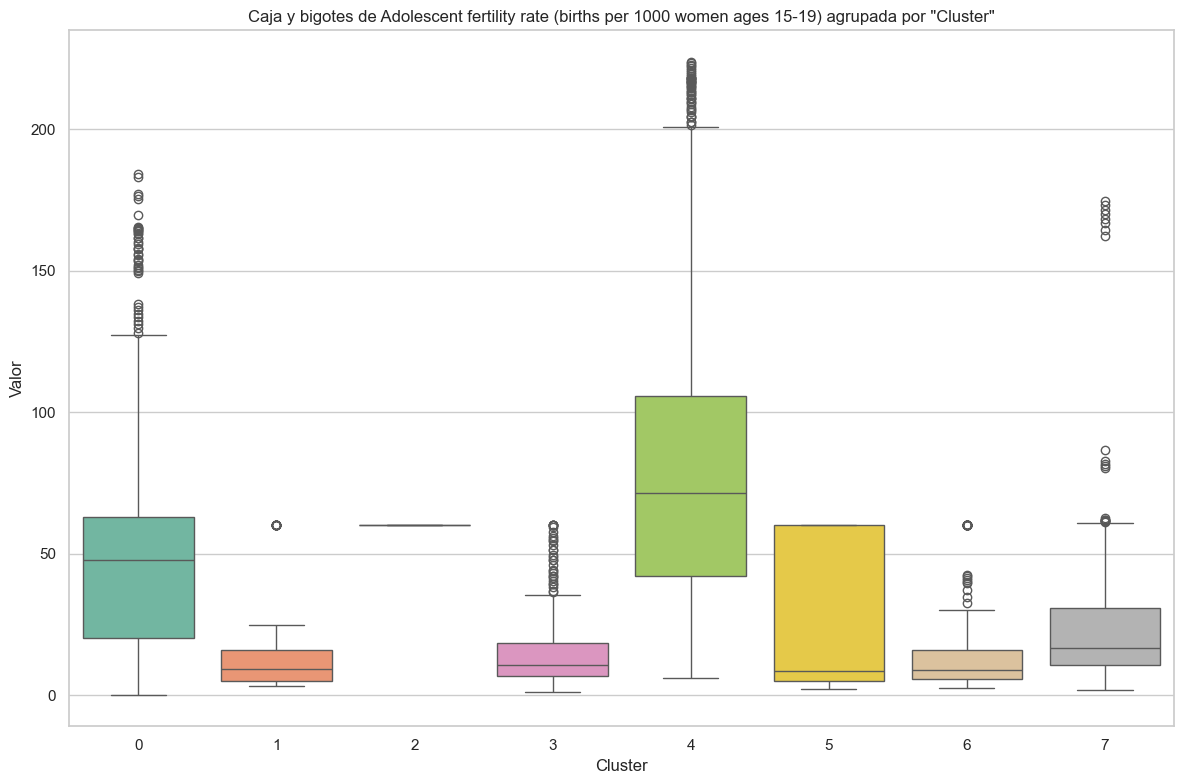

C:\Users\erick\AppData\Local\Temp\ipykernel_11024\4116678144.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




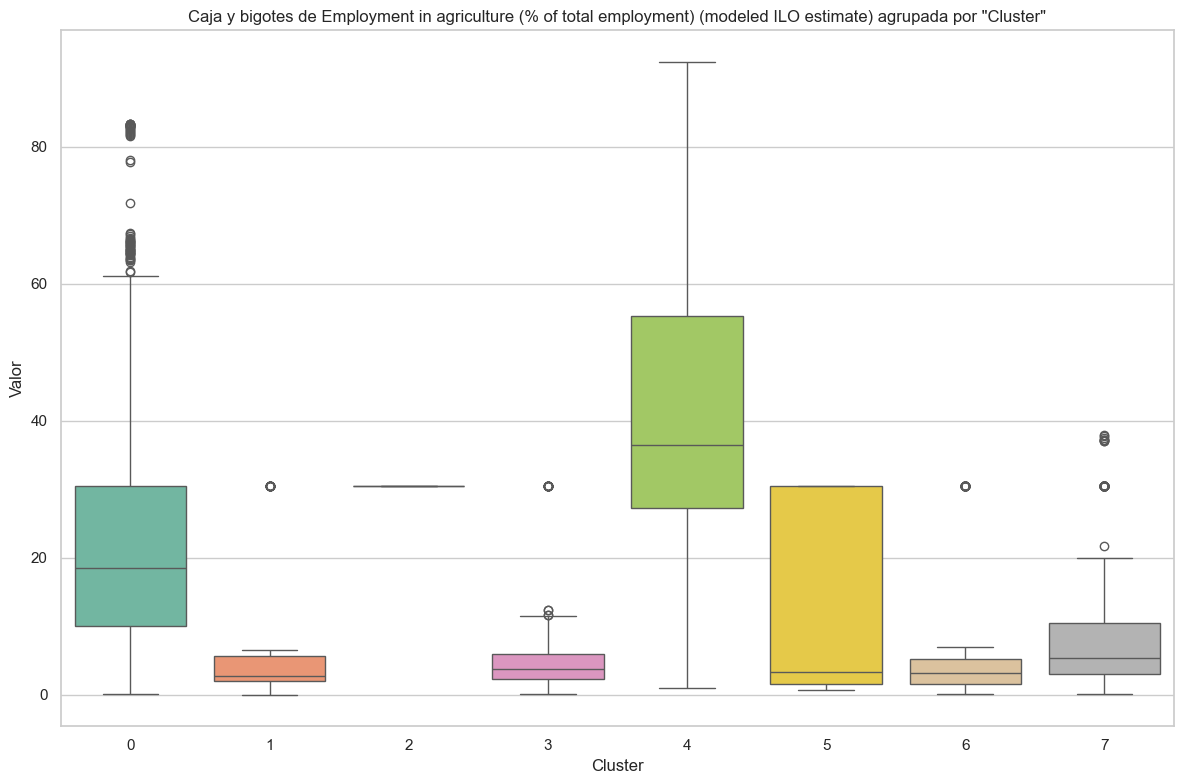

C:\Users\erick\AppData\Local\Temp\ipykernel_11024\4116678144.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




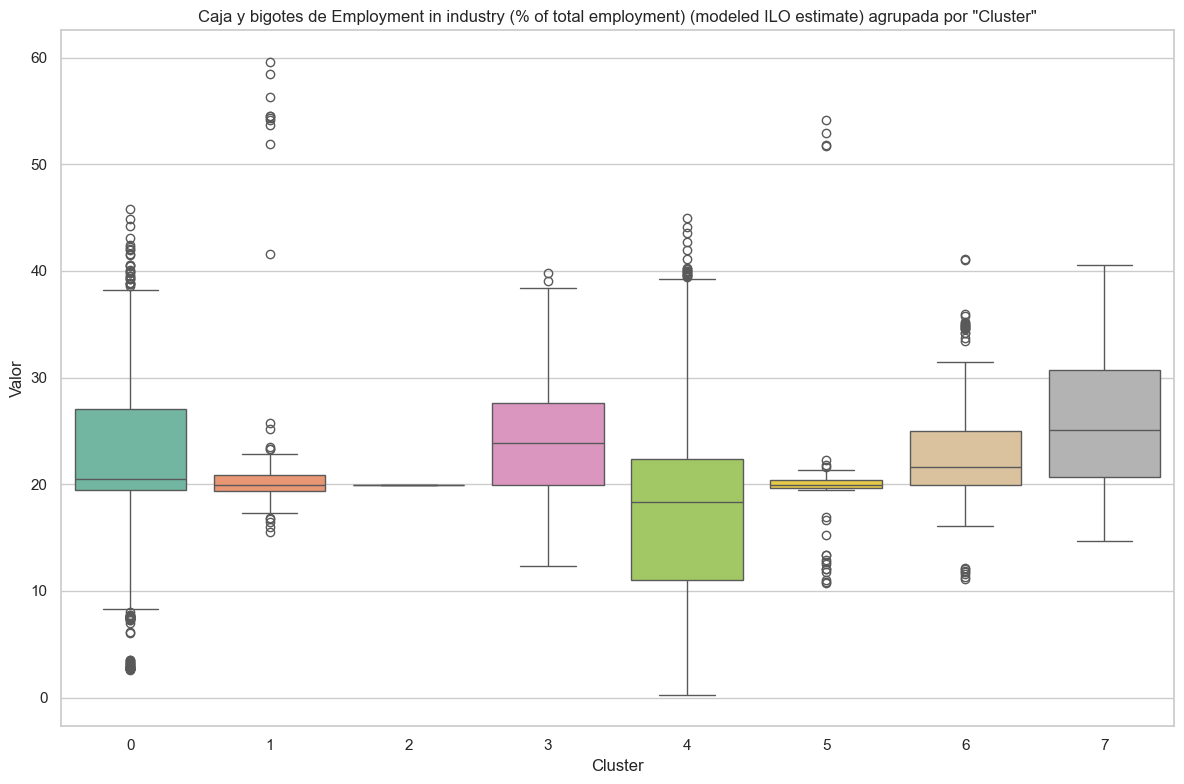

C:\Users\erick\AppData\Local\Temp\ipykernel_11024\4116678144.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




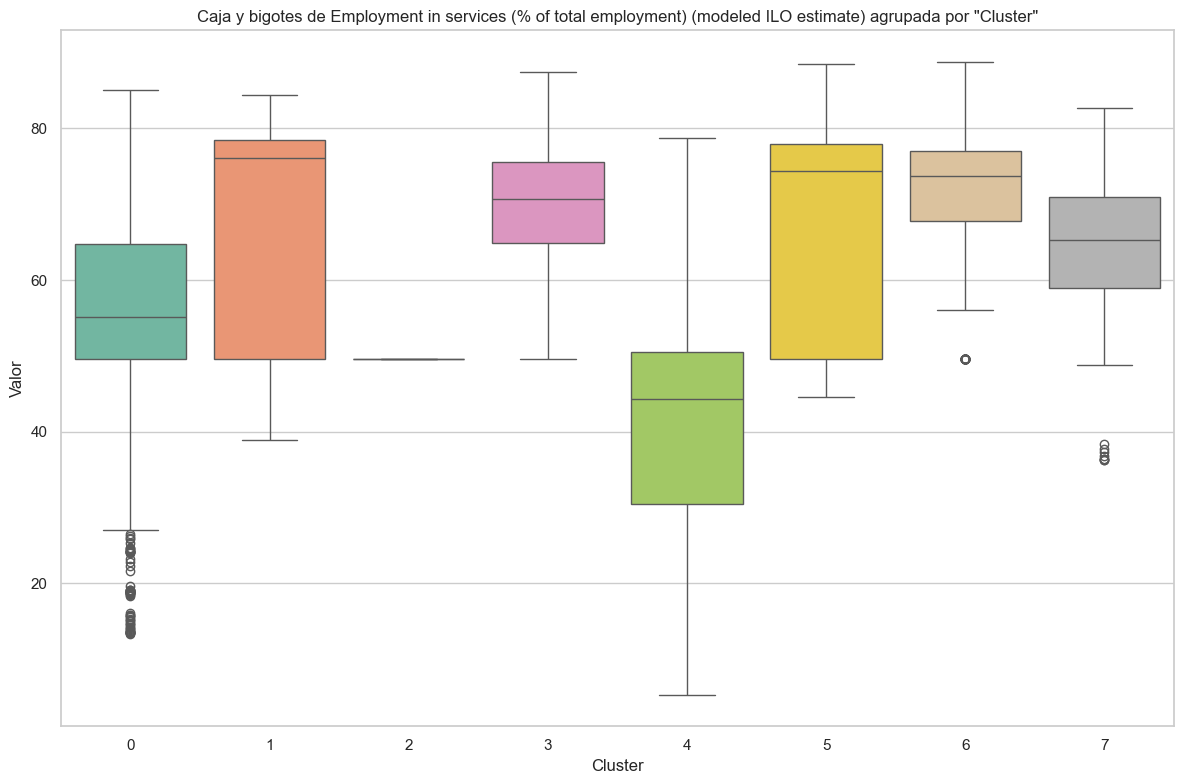

C:\Users\erick\AppData\Local\Temp\ipykernel_11024\4116678144.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




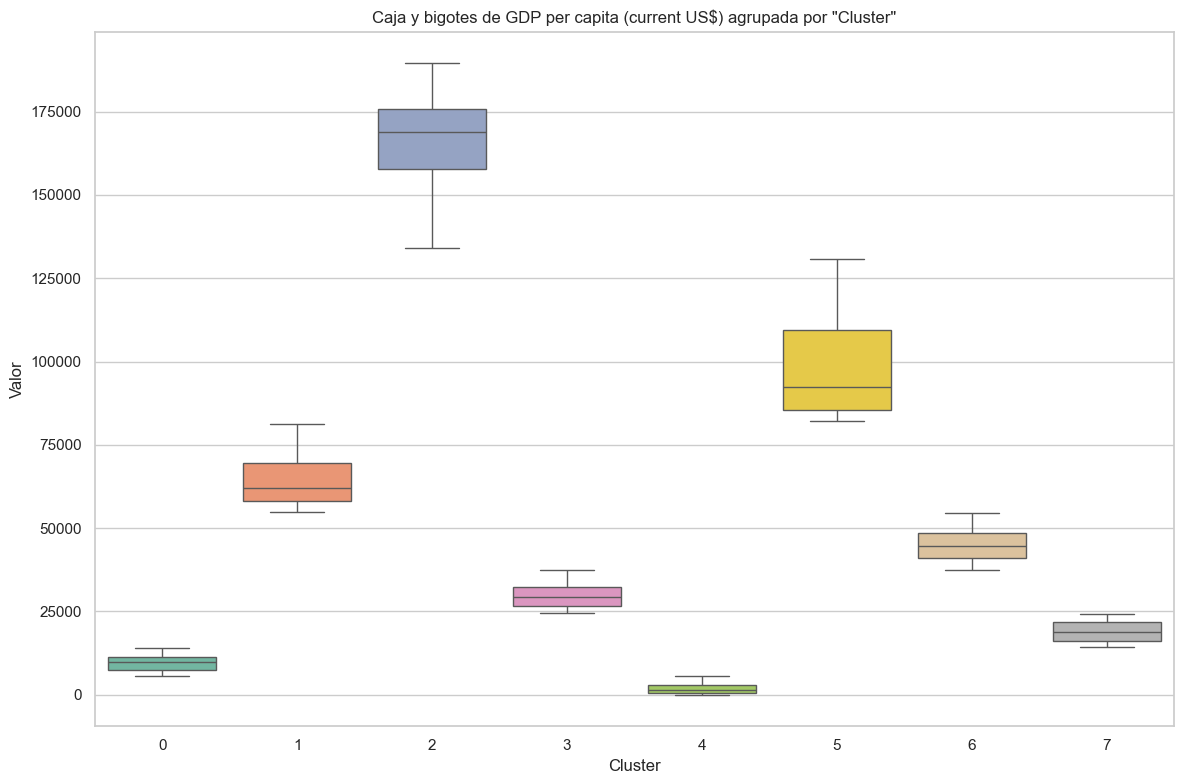

C:\Users\erick\AppData\Local\Temp\ipykernel_11024\4116678144.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




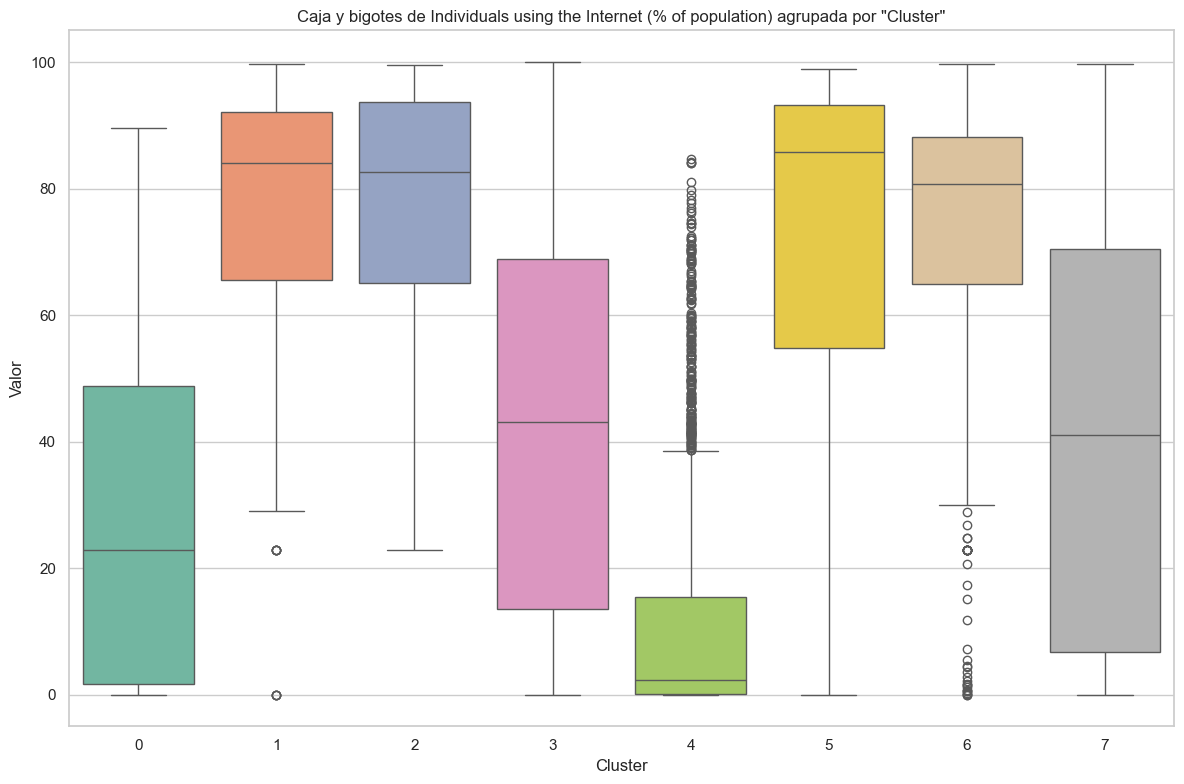

C:\Users\erick\AppData\Local\Temp\ipykernel_11024\4116678144.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




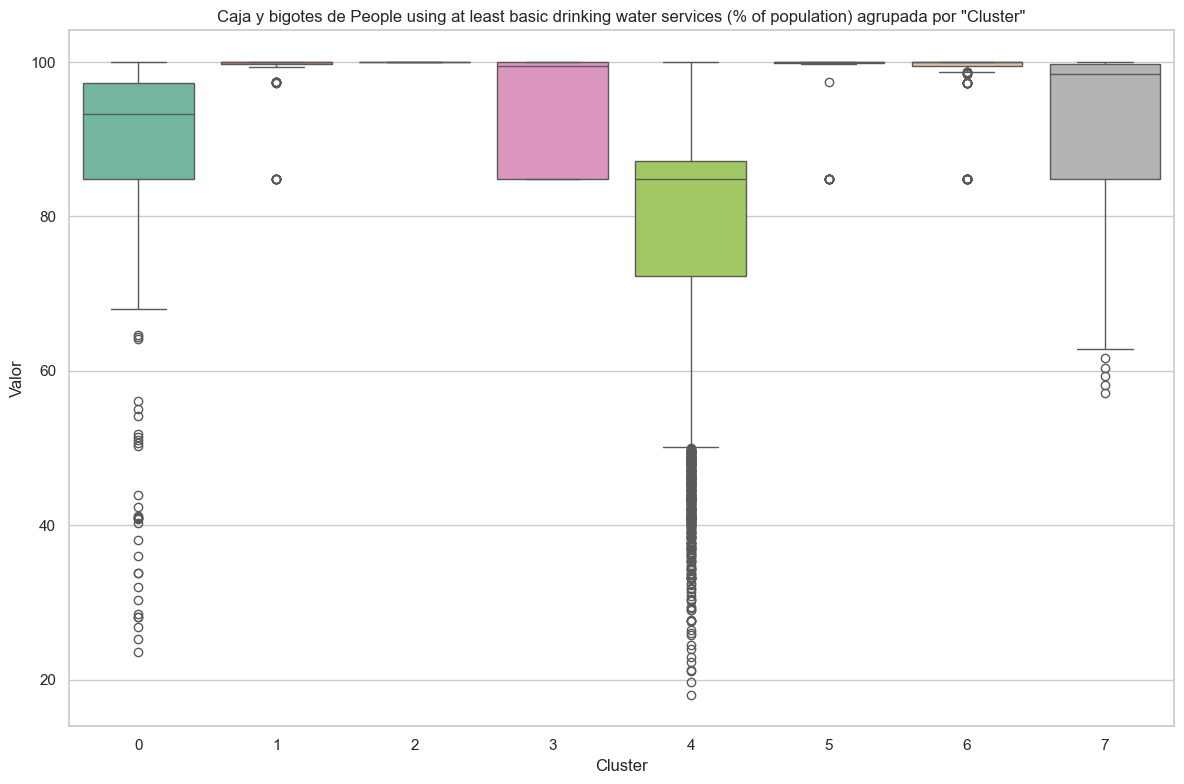

C:\Users\erick\AppData\Local\Temp\ipykernel_11024\4116678144.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




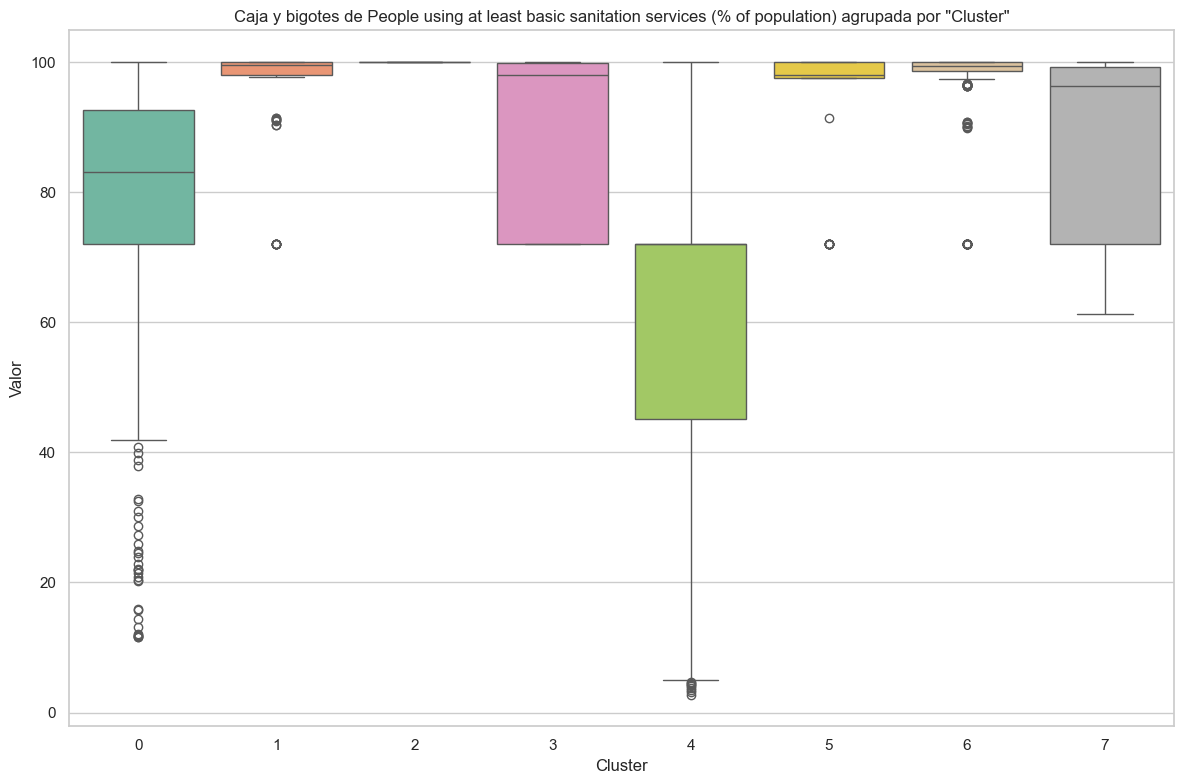

C:\Users\erick\AppData\Local\Temp\ipykernel_11024\4116678144.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




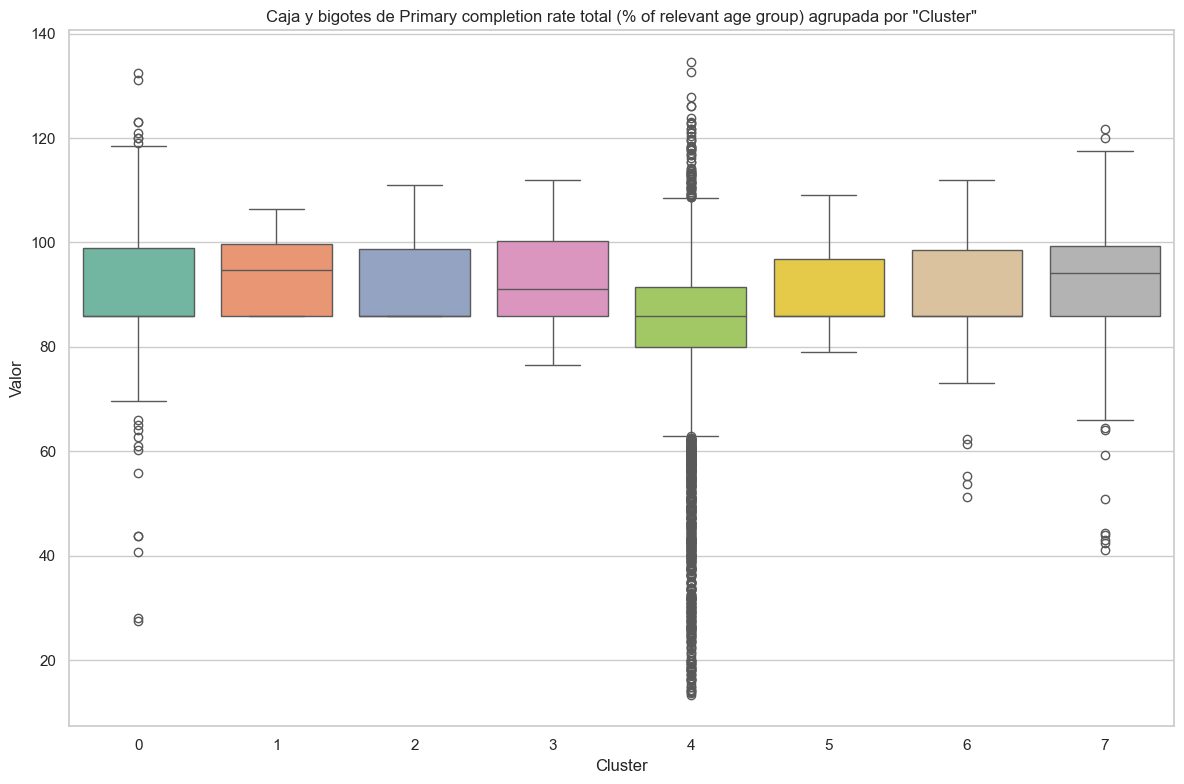

C:\Users\erick\AppData\Local\Temp\ipykernel_11024\4116678144.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




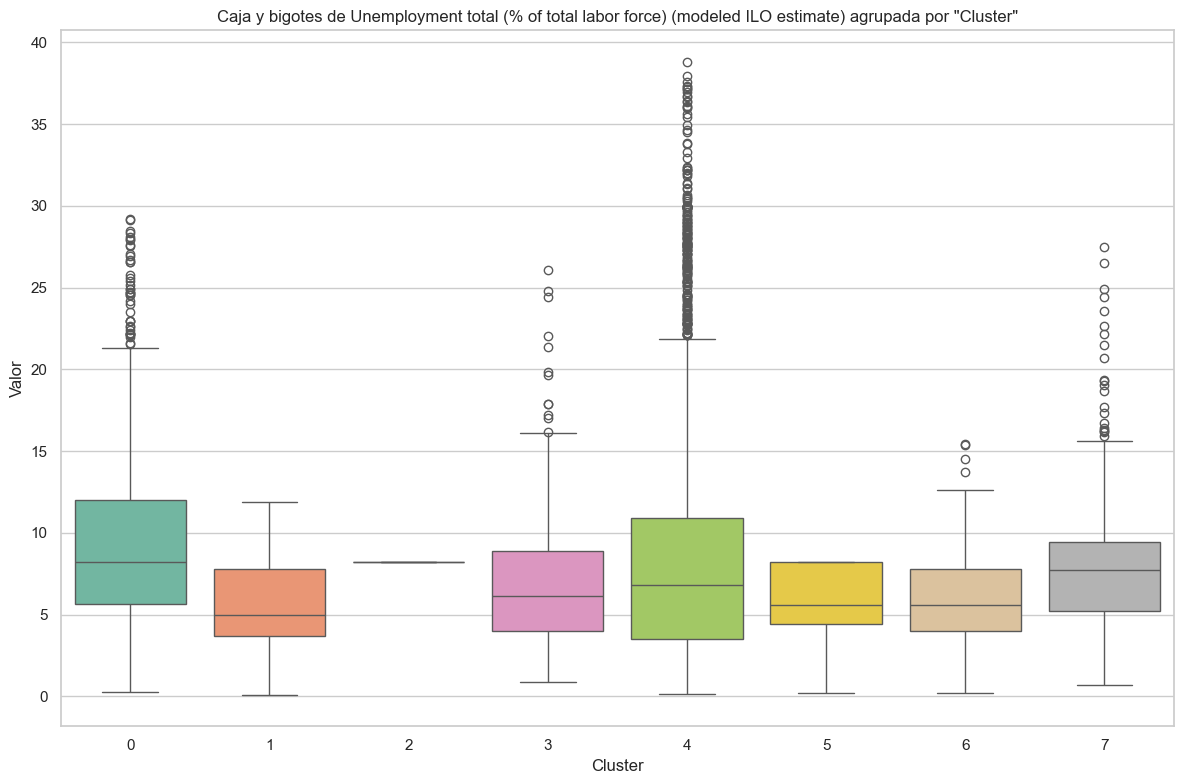

C:\Users\erick\AppData\Local\Temp\ipykernel_11024\4116678144.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




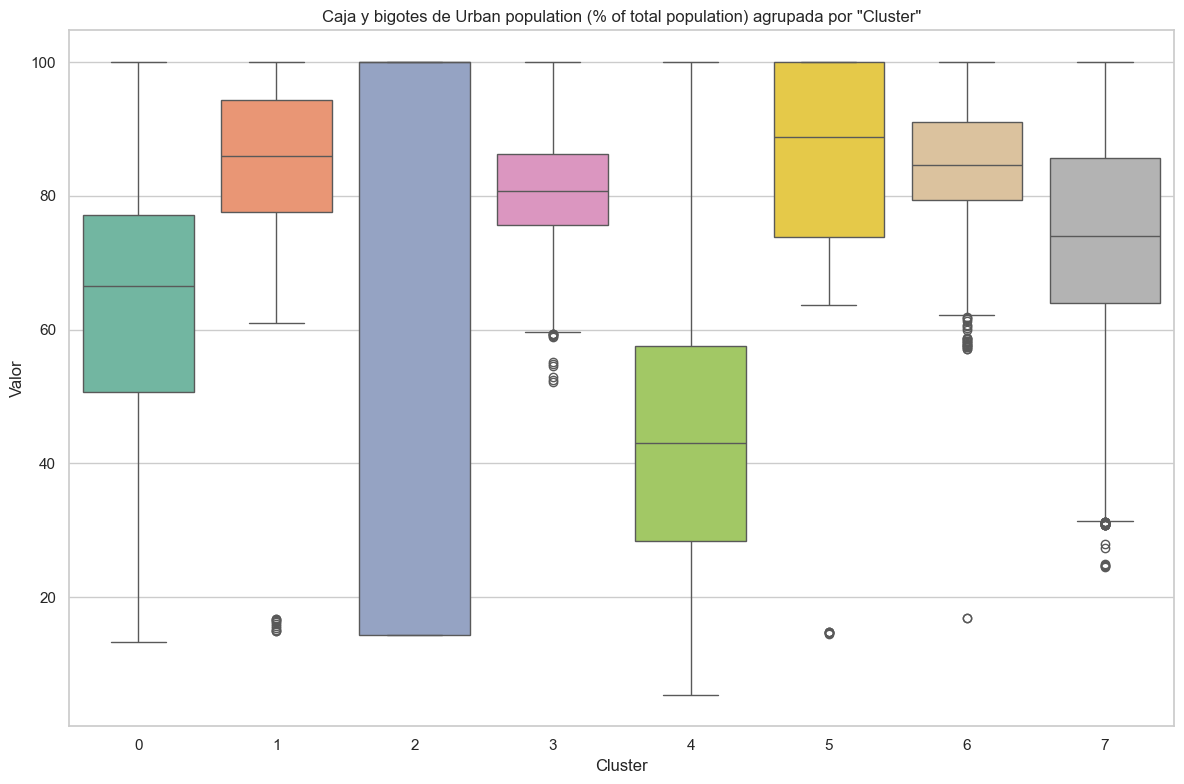

C:\Users\erick\AppData\Local\Temp\ipykernel_11024\4116678144.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




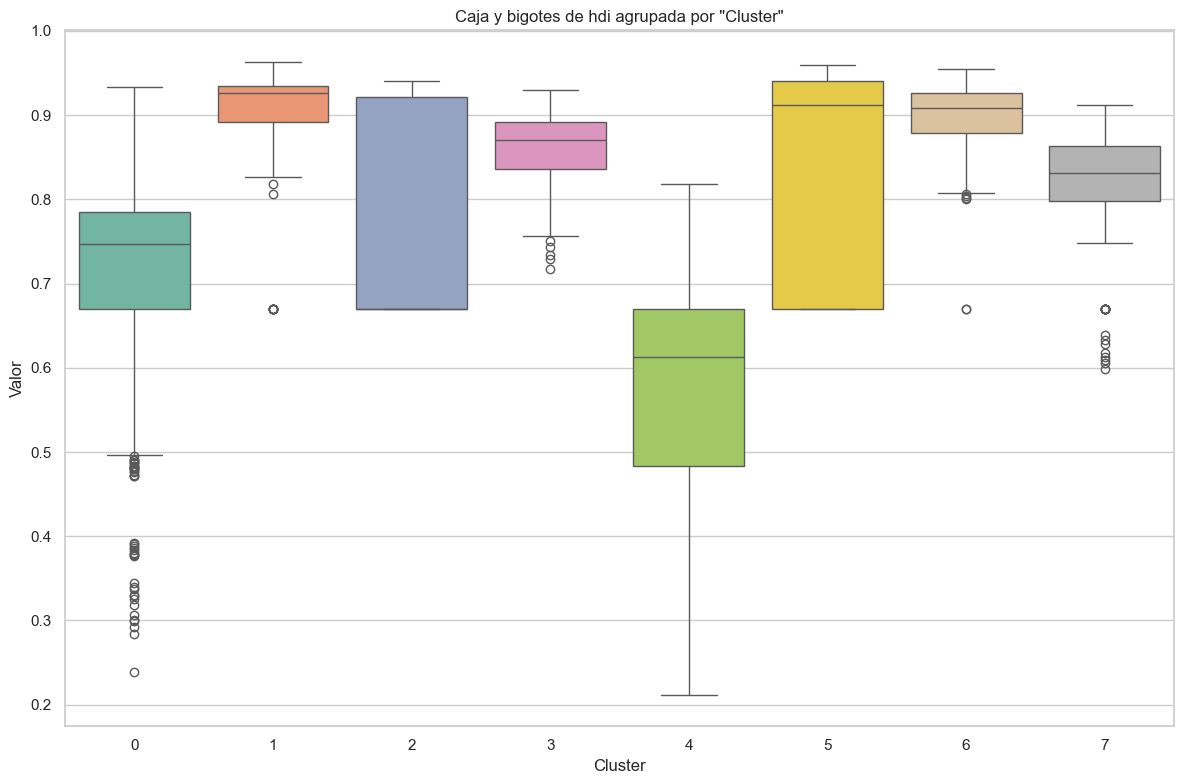

C:\Users\erick\AppData\Local\Temp\ipykernel_11024\4116678144.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




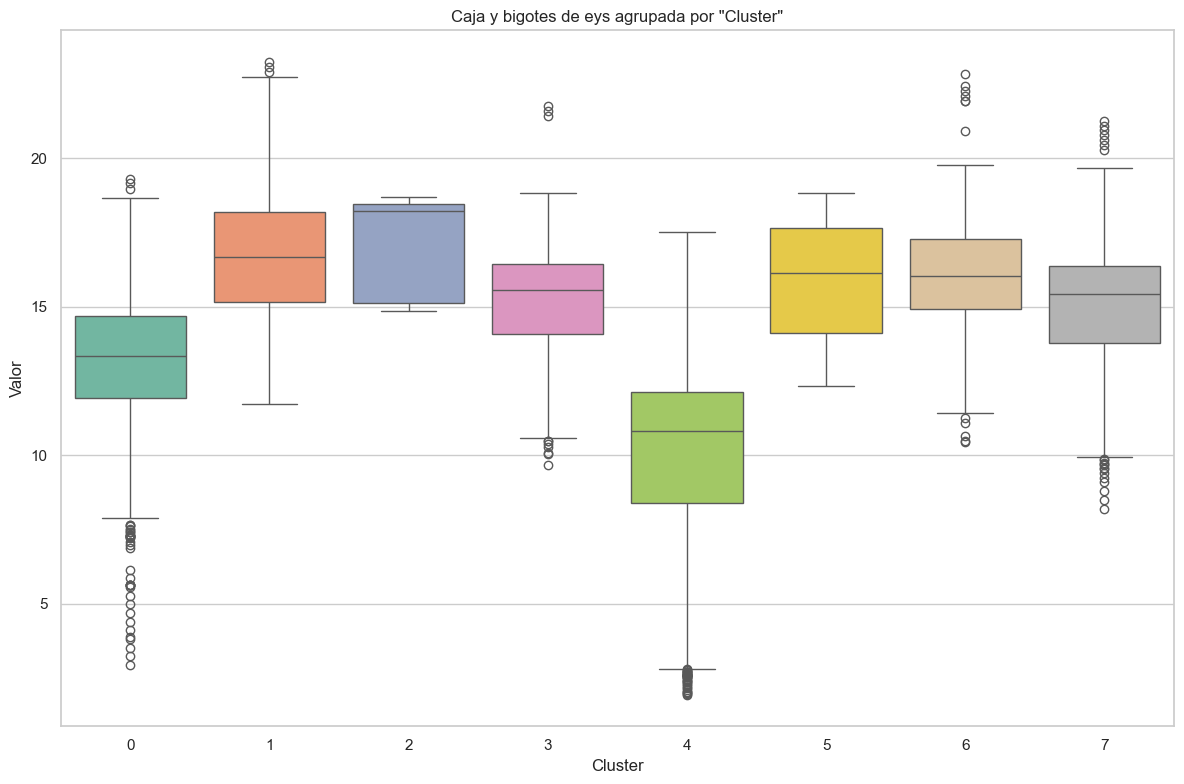

C:\Users\erick\AppData\Local\Temp\ipykernel_11024\4116678144.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




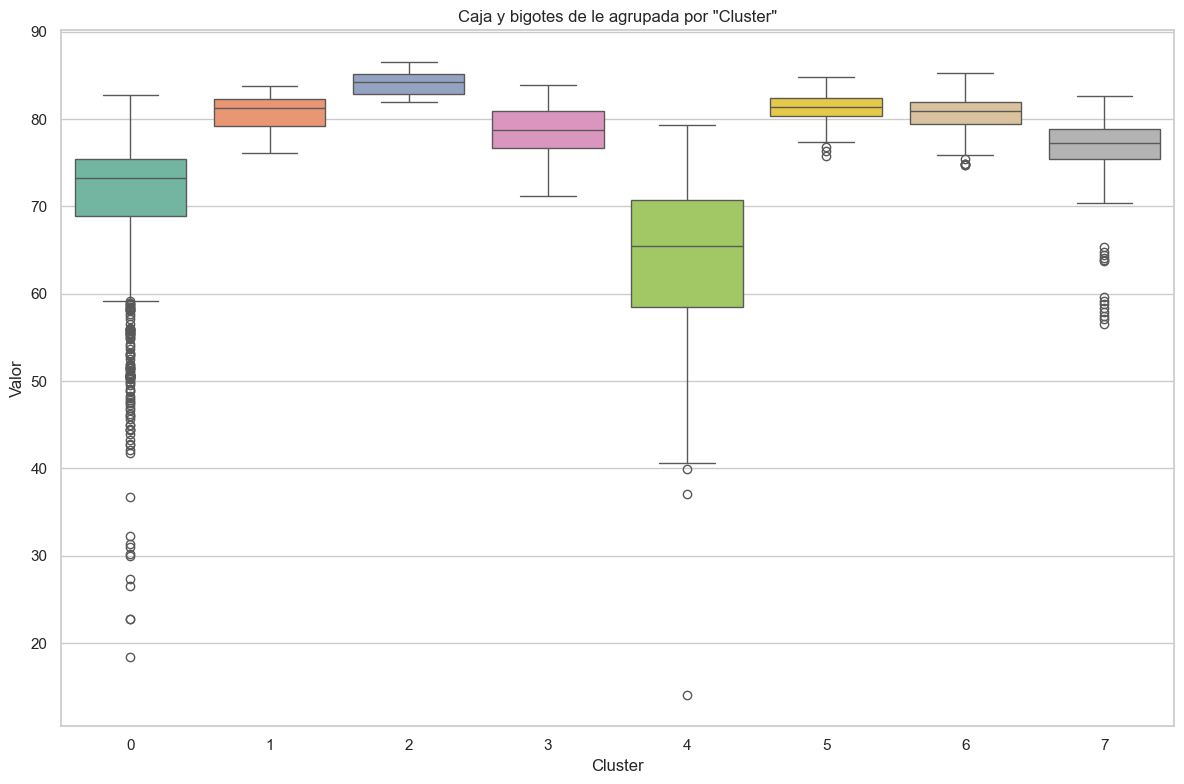

C:\Users\erick\AppData\Local\Temp\ipykernel_11024\4116678144.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




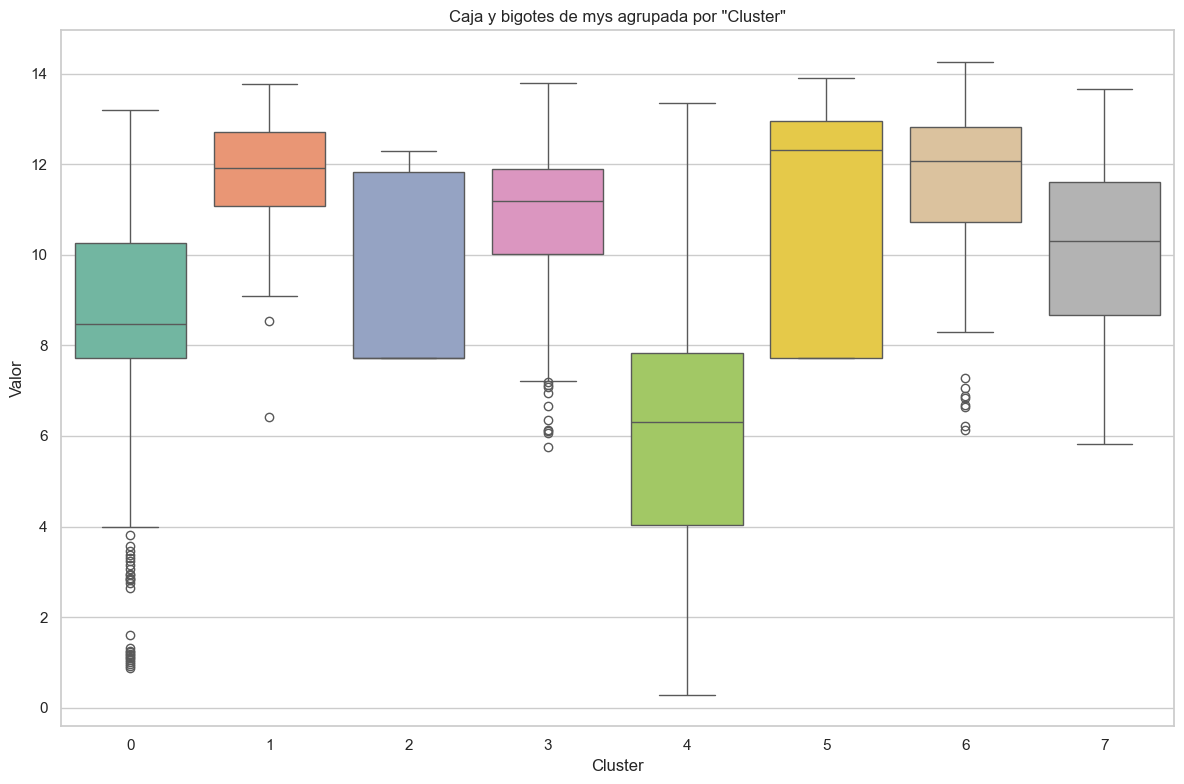

C:\Users\erick\AppData\Local\Temp\ipykernel_11024\4116678144.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




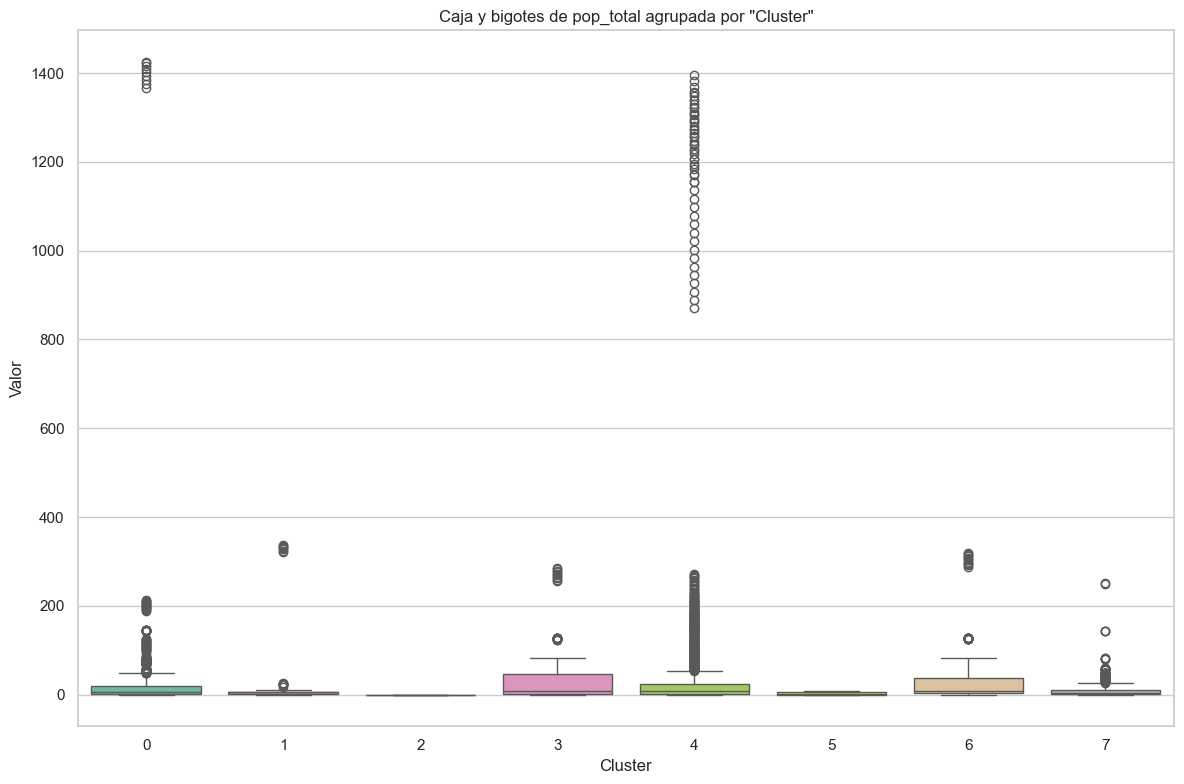

In [442]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(style="whitegrid")

quantitative_columns = df_cluster_elbow.columns[df_cluster_elbow.columns != 'Cluster']

for column in quantitative_columns:
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=df_cluster_elbow, x="Cluster", y=column, palette="Set2")
    plt.title(f'Caja y bigotes de {column} agrupada por "Cluster"')
    plt.xlabel('Cluster')
    plt.ylabel('Valor')
    plt.tight_layout()
    plt.show()
